In [1]:
# Importing necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Importing necessary libraries for data manipulation and visualization
import kagglehub
path = kagglehub.dataset_download("surajjha101/cuisine-rating")
print("Path to dataset files:", path)

Path to dataset files: /home/kyrios1018/.cache/kagglehub/datasets/surajjha101/cuisine-rating/versions/2


In [3]:
# Reading the dataset into a pandas DataFrame for further analysis
df = pd.read_csv('/home/kyrios1018/.cache/kagglehub/datasets/surajjha101/cuisine-rating/versions/2/Cuisine_rating.csv')
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [4]:
df.shape

(200, 15)

In [5]:
df.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


### Data Cleaning

In [7]:
# check whether data has none or null or NaN values
print(df.isnull().sum())
# no null or NaN or None values in data

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64


In [8]:
# drops all rows with null or none values
df.dropna(inplace=True)

In [9]:
# checking for any duplicated rows
df.duplicated().sum()
# No duplicated rows in data

0

In [10]:
# drops all duplicated rows and keeps only first occurences of those rows
df.drop_duplicates(inplace=True)

### Data Visualization

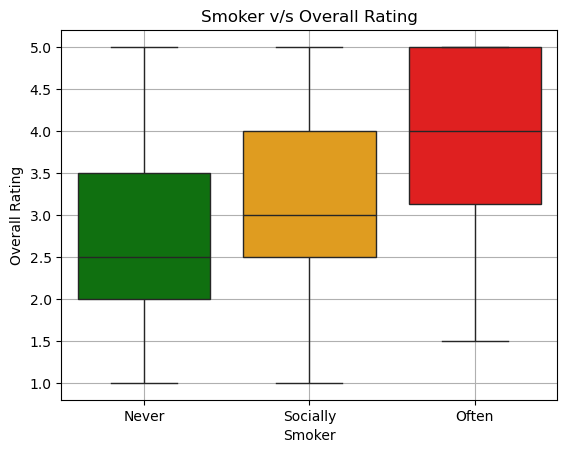

In [11]:
sns.boxplot(x='Smoker',y='Overall Rating', data=df,hue='Smoker',palette={'Often': 'red', 'Socially': 'orange','Never':'green'})
plt.grid()
plt.title('Smoker v/s Overall Rating')
plt.show()

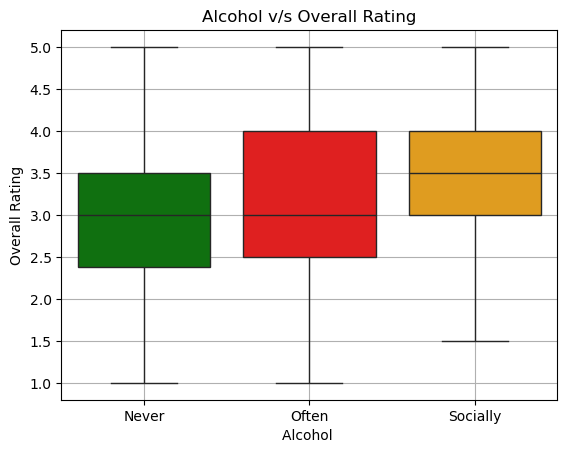

In [12]:
sns.boxplot(x='Alcohol ',y='Overall Rating',data=df,hue='Alcohol ',palette={'Often': 'red', 'Socially': 'orange','Never':'green'})
plt.grid()
plt.title('Alcohol v/s Overall Rating')
plt.show()

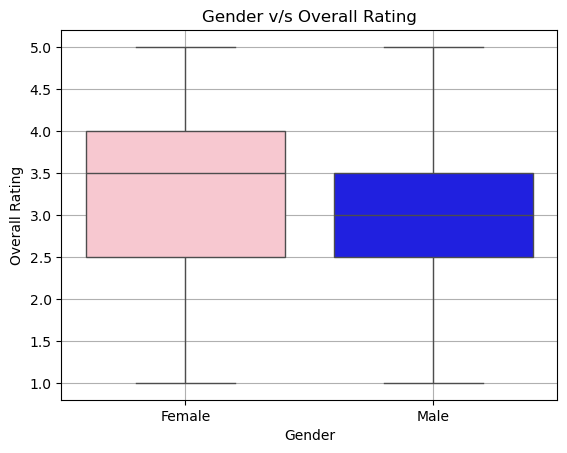

In [13]:
sns.boxplot(x='Gender',y='Overall Rating', data=df,hue='Gender',palette={'Male': 'blue', 'Female': 'pink'})
plt.grid()
plt.title('Gender v/s Overall Rating')
plt.show()

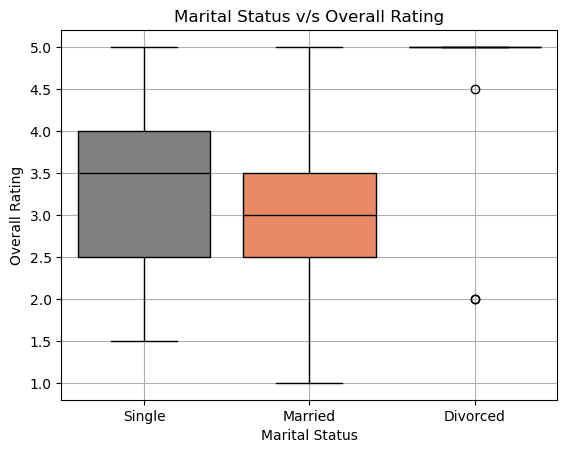

In [14]:
sns.boxplot(x='Marital Status',y='Overall Rating', data=df,hue='Marital Status',palette={'Single': 'grey', 'Married': 'coral' , 'Divorced':'black'})
plt.grid()
plt.title('Marital Status v/s Overall Rating')
plt.show()

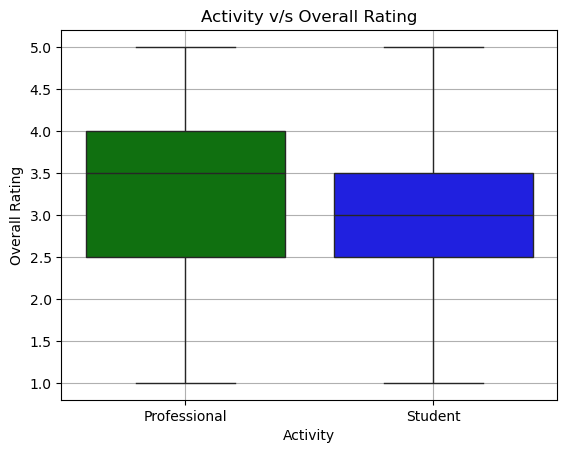

In [15]:
sns.boxplot(x='Activity',y='Overall Rating', data=df,hue='Activity',palette={'Student': 'blue', 'Professional': 'green'})
plt.grid()
plt.title('Activity v/s Overall Rating')
plt.show()

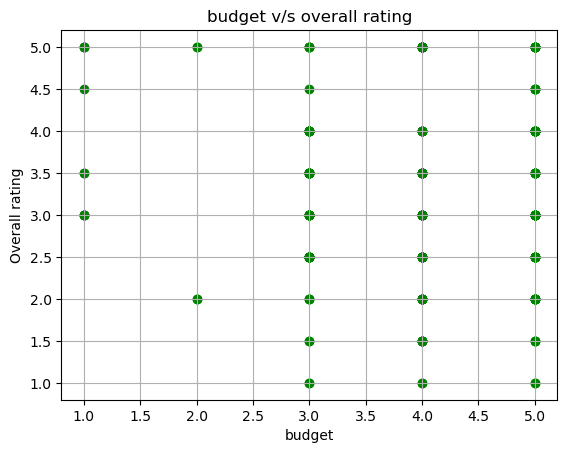

In [16]:
x=df['Budget']
y=df['Overall Rating']
plt.scatter(x,y,color='green')
plt.xlabel('budget')
plt.ylabel('Overall rating')
plt.title('budget v/s overall rating')
plt.grid()
plt.show()

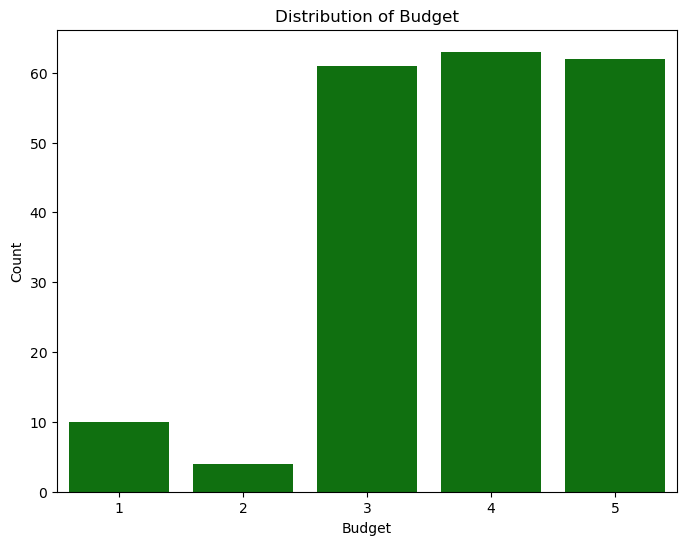

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Budget', data=df,color='green')
plt.xlabel('Budget')
plt.ylabel('Count')
plt.title('Distribution of Budget')
plt.show()

In [18]:
numeric_data = df.select_dtypes(include=['int64','float64'])
numeric_data.head()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
0,1,153,2006,3,5,4,4.5
1,2,123,1991,3,1,1,1.0
2,3,122,1977,5,5,5,5.0
3,4,153,1956,5,3,1,2.0
4,5,129,1997,4,2,4,3.0


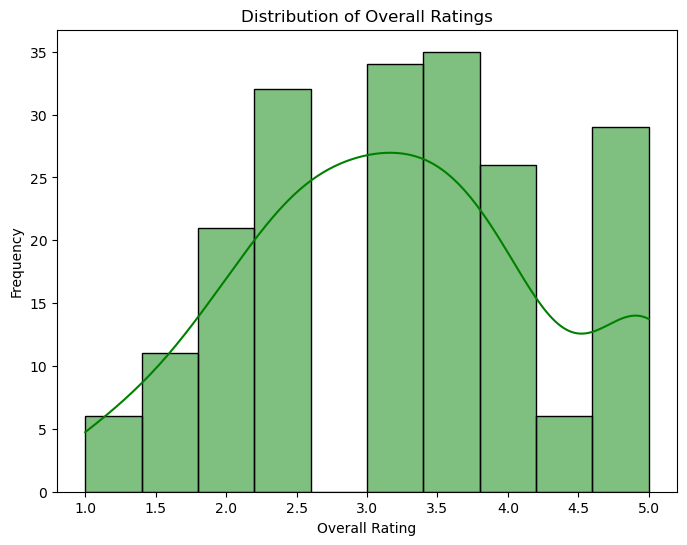

In [19]:
# Creating a histogram to visualize the distribution of 'Overall Rating'
# Bins represent intervals of the data, kde=True adds a density curve
plt.figure(figsize=(8, 6))
sns.histplot(df['Overall Rating'], bins=10, kde=True, color='green')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

### Correlation Analysis

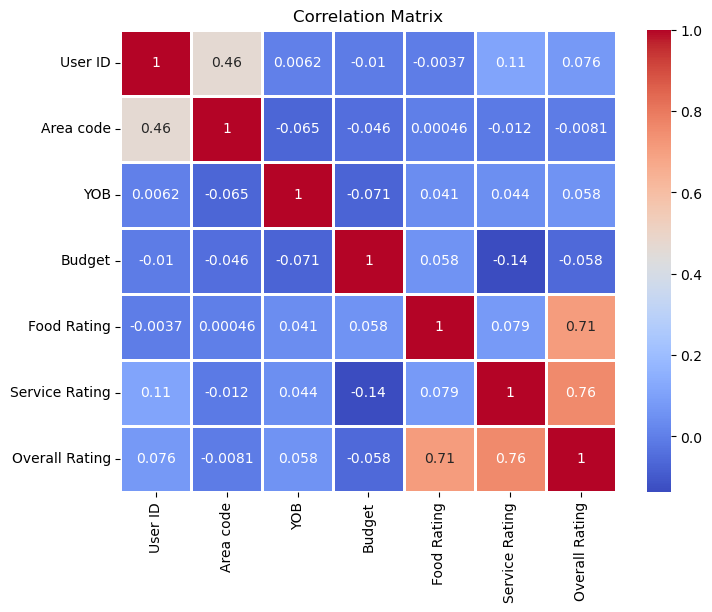

In [20]:
# Generating a heatmap to display the correlation between numerical features
# Annot=True displays correlation values, cmap sets the color palette
plt.figure(figsize=(8, 6))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidth=1)
plt.title('Correlation Matrix')
plt.show()

In [21]:
corr_details=df[['Food Rating','Service Rating','Overall Rating']].corr()
corr_details

,Food Rating,Service Rating,Overall Rating
Food Rating,1.000000,0.079056,0.709562
Service Rating,0.079056,1.000000,0.758532
Overall Rating,0.709562,0.758532,1.000000


### Descriptive Statistics

In [22]:
df_description = df.describe(include = 'all')
df_description

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
count,200.000000,200.000000,200,200,200.000000,200,200,200.000000,200,200,200,200.000000,200.000000,200.000000,200
unique,NaN,NaN,10,2,NaN,3,2,NaN,7,3,3,NaN,NaN,NaN,2
top,NaN,NaN,"St. George,NY",Male,NaN,Single,Student,NaN,Japanese,Never,Socially,NaN,NaN,NaN,No
freq,NaN,NaN,46,118,NaN,100,120,NaN,36,88,71,NaN,NaN,NaN,174
mean,100.500000,141.060000,NaN,NaN,1984.830000,NaN,NaN,3.815000,NaN,NaN,NaN,3.220000,3.230000,3.225000,NaN
std,57.879185,26.130257,NaN,NaN,16.809339,NaN,NaN,1.056578,NaN,NaN,NaN,1.411226,1.526022,1.079445,NaN
min,1.000000,101.000000,NaN,NaN,1955.000000,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,50.750000,123.000000,NaN,NaN,1971.000000,NaN,NaN,3.000000,NaN,NaN,NaN,2.000000,2.000000,2.500000,NaN
50%,100.500000,135.000000,NaN,NaN,1987.000000,NaN,NaN,4.000000,NaN,NaN,NaN,3.000000,3.000000,3.000000,NaN
75%,150.250000,158.000000,NaN,NaN,2000.000000,NaN,NaN,5.000000,NaN,NaN,NaN,5.000000,5.000000,4.000000,NaN
